# PVICE & Relog - PCA baselines for Si & CdTe & MassFlows Calculations

ReEDS installation projections from the Solar Futures Study, published by DOE on 2021.

Current sections include:

Scenarios of Interest:
o	95-by-35+Elec.Adv+DR ,  a.k.a. "Solar Futures Decarbonization + Electrification scenario"


In [1]:
import PV_ICE
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'PV_ICE' / 'TEMP')

print ("Your simulation will be stored in %s" % testfolder)


Your simulation will be stored in C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP


In [3]:
PV_ICE.__version__

'v0.2.0+354.g1e88266.dirty'

## 1. Create Scenarios

### A. Reading a standard ReEDS output file

In [4]:
reedsFile = str(Path().resolve().parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx')
print ("Input file is stored in %s" % reedsFile)

Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures v3a.xlsx


In [5]:
REEDSInput = pd.read_excel(reedsFile,
#                        sheet_name="new installs PV (2)")
                       sheet_name="new installs PV")

#index_col=[0,2,3]) #this casts scenario, PCA and State as levels


### B. Save Input Files by PCA

#### Create a copy of the REEDS Input and modify structure for PCA focus

In [6]:
rawdf = REEDSInput.copy()
rawdf.drop(columns=['State'], inplace=True)
rawdf.drop(columns=['Tech'], inplace=True) #tech=pvtotal from "new installs PV sheet", so can drop
rawdf.set_index(['Scenario','Year','PCA'], inplace=True)
rawdf.head(21)

Capacity (GW)
Scenario     Year PCA               
95-by-35.Adv 2010 p1        0.000017
             2011 p1        0.005158
             2012 p1        0.005158
             2013 p1        0.007146
             2014 p1        0.007146
             2015 p1        0.018253
             2016 p1        0.018253
             2017 p1        0.019460
             2018 p1        0.019460
             2019 p1        0.036320
             2020 p1        0.036320
             2021 p1        0.002434
             2022 p1        0.002434
             2023 p1        0.010066
             2024 p1        0.010066
             2025 p1        0.049445
             2026 p1        0.049445
             2027 p1        0.051342
             2028 p1        0.051342
             2029 p1        0.105931
             2030 p1        0.105931

#### Loading Module Baseline. Will be used later to populate all the columns other than 'new_Installed_Capacity_[MW]' which will be supplied by the REEDS model

In [7]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='cSi', massmodulefile=r'../baselines/RELOG/baseline_modules_mass_US_cSi.csv')
# MAC: I think we probably want noCircularity so everything goes to landfill and
# it's easy to calculate the 'BEST case for Recycling scenario'. Otherwise comment out...
r1.scenMod_noCircularity() 


baseline = r1.scenario['cSi'].dataIn_m
baseline = baseline.drop(columns=['new_Installed_Capacity_[MW]'])
baseline.set_index('year', inplace=True)
baseline.index = pd.PeriodIndex(baseline.index, freq='A')  # A -- Annual
baseline.head()

r1.createScenario(name='CdTe', massmodulefile=r'../baselines/RELOG/baseline_modules_mass_US_CdTe.csv')
# MAC: I think we probably want noCircularity so everything goes to landfill and
# it's easy to calculate the 'BEST case for Recycling scenario'. Otherwise comment out...
r1.scenMod_noCircularity() 
baselineCdTe = r1.scenario['CdTe'].dataIn_m
baselineCdTe = baselineCdTe.drop(columns=['new_Installed_Capacity_[MW]'])
baselineCdTe.set_index('year', inplace=True)
baselineCdTe.index = pd.PeriodIndex(baselineCdTe.index, freq='A')  # A -- Annual
baselineCdTe.head()

path = C:\Users\sayala\Documents\GitHub\PV_ICE\PV_ICE\TEMP


,mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_Repair,mod_MerchantTail,mod_EOL_collection_eff,mod_EOL_pg0_resell,mod_EOL_pg1_landfill,mod_EOL_pg2_stored,mod_EOL_pg3_reMFG,mod_EOL_pg4_recycled,mod_EOL_reMFG_yield,mod_EOL_sp_reMFG_recycle,mod_EOL_pb1_landfill,mod_EOL_pb2_stored,mod_EOL_pb3_reMFG,mod_EOL_pb4_recycled
year,,,,,,,,,,,,,,,,,,,,
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0


#### For each Scenario and for each PCA, combine with baseline and save as input file

In [ ]:
# Set header dynamically

In [8]:
import csv

massmodulefile=r'../baselines/RELOG/baseline_modules_mass_US_cSi.csv'

with open(massmodulefile, newline='') as f:
    reader = csv.reader(f)
    row1 = next(reader)  # gets the first line
    row2 = next(reader)  # gets the first line

row11 = 'year'
for x in row1[1:]:
    row11 = row11 + ',' + x 

row22 = 'year'
for x in row2[1:]:
    row22 = row22 + ',' + x 

In [9]:
# Load MarketShare File

In [10]:
marketsharefile = r'../baselines/SupportingMaterial/output_RELOG_cSi_CdTe_capacity_reeds.csv'
marketshare = pd.read_csv(marketsharefile)
# Not elegant but I need to trim down to ReEds year start which is 2010
marketshare = marketshare[marketshare['Year']>=2010].reset_index(drop=True)
marketshare.set_index('Year', inplace=True)
marketshare.head()

,Nameplate Capacity (MW),cSi Market Share,CdTe Market Share,cSi Capacity (MW),CdTe Capacity (MW)
Year,,,,,
2010,848.588,0.85,0.14,721.29980,118.80232
2011,1920.510,0.93,0.06,1786.07430,115.23060
2012,3373.427,0.91,0.07,3069.81857,236.13989
2013,4765.802,0.85,0.10,4050.93170,476.58020
2014,6243.873,0.60,0.35,3746.32380,2185.35555


In [34]:
# Hack for plots...
xvals = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
             '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025',
             '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033',
             '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041',
             '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
             '2050']

sparkplotfolder = os.path.join(testfolder, 'SPARKPLOTS')
if not os.path.exists(sparkplotfolder):
    os.makedirs(sparkplotfolder)
sparkplot = True

In [40]:
plt.rcParams.update({'font.size': 8})

KeyboardInterrupt: 

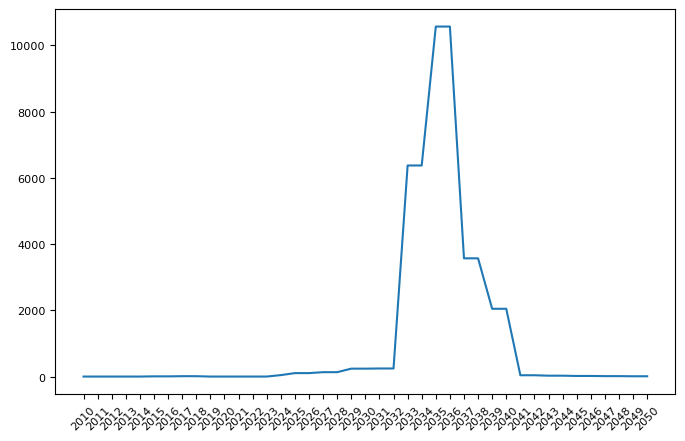

In [122]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1]
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0]
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_cSI_'+PCA +'.csv'
    subtestfolder = os.path.join(testfolder, 'PCAs_RELOG')
    if not os.path.exists(subtestfolder):
        os.makedirs(subtestfolder)
    filetitle = os.path.join(subtestfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = pd.DataFrame(A)
    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['cSi Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    # Sort Ascending 2022 to 2035 new_Installed_Capacity_[MW]
    # Sort Descending 2035 to 2050 new_Installed_Capacity_[MW]
    sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
    +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
    sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
    # Add other columns
    B = pd.concat([sortedBdf.reindex(A.index), baseline.reindex(A.index)], axis=1)
   
    header = row11 + '\n' + row22 + '\n'
    
    # SPARK PLOT
    if sparkplot:
        fig, axs = plt.subplots(figsize=(8, 5), facecolor='w', edgecolor='k')
        plt.plot(xvals, B['new_Installed_Capacity_[MW]'].values)
        plt.xticks(rotation=45)
        figtitle = 'PV ICE ' + SCEN + ' Baseline_Csi_'+PCA+'.png'
        fig.savefig(os.path.join(sparkplotfolder, figtitle), dpi=600)
        plt.close(fig) # This avoids the figure from displayig and getting all the warnings
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    
    filetitle = SCEN+'_CdTe_'+PCA +'.csv'
    filetitle = os.path.join(subtestfolder, filetitle)

    B = A.copy()
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * marketshare['CdTe Market Share'].values
    B['new_Installed_Capacity_[MW]'] = B['new_Installed_Capacity_[MW]'] * 1000   # ReEDS file is in GW.
    sortedB = (list(B.iloc[0:12]['new_Installed_Capacity_[MW]'].values) + list(B.iloc[12:25]['new_Installed_Capacity_[MW]'].sort_values().values)
    +list(B.iloc[25::]['new_Installed_Capacity_[MW]'].sort_values(ascending=False).values))
    sortedBdf = pd.DataFrame(sortedB, index = A.index, columns =['new_Installed_Capacity_[MW]'])
    # Add other columns
    B = pd.concat([sortedBdf.reindex(A.index), baseline.reindex(A.index)], axis=1)
    
    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        B.to_csv(ict, header=False)
    

In [ ]:
PCAs = list(rawdf.unstack(level=2).iloc[0].unstack(level=0).index.unique())

## 2. Loading the PCA baselines and doing the PV ICE Calculations

In [ ]:
SFscenarios = ['95-by-35_Elec.Adv_DR_cSi', '95-by-35_Elec.Adv_DR_CdTe']

### Reading GIS inputs

In [ ]:
from geopy.geocoders import Nominatim
from geopy.point import Point
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [ ]:
GIS

In [ ]:
GIS.reset_index(inplace=True)

In [ ]:
for row in range(len(GIS)):
    Longitude = GIS.loc[row].long
    Latitude = GIS.loc[row].lat
    location = geolocator.reverse(Point(Latitude, Longitude))
    address = location.raw['address']
    city = address.get('city', '')
    county = address.get('county', '')
    state = address.get('state', '')
    GIS.loc[row].location = str(county + ", " + state) 
    

In [ ]:
def city_state_country(row):
    coord = f"{row['lat']}, {row['long']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    county = address.get('county', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['county'] = county
    row['state'] = state
    row['country'] = country
    return row

#### Create the 2 Scenarios and assign Baselines

Keeping track of each scenario as its own PV ICE Object.

In [ ]:
Path().resolve().parent

In [ ]:
baselinefolder = os.path.join(Path().resolve().parent, 'baselines')

In [ ]:
baselinefolder

In [ ]:
testfolder

In [ ]:
#for ii in range (0, 1): #len(scenarios):
i = 0
r1 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs_RELOG', filetitle)    
    r1.createScenario(name=PCAs[jj], massmodulefile=filetitle)
    r1.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=baselinefolder)
    # All -- but these where not included in the Reeds initial study as we didnt have encapsulant or backsheet
    # r1.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=r'..\baselines')
    r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

r1.trim_Years(startYear=2010, endYear=2050)

i = 1
r2 = PV_ICE.Simulation(name=SFscenarios[i], path=testfolder)

for jj in range (0, len(PCAs)): 
    filetitle = SFscenarios[i]+'_'+PCAs[jj]+'.csv'
    filetitle = os.path.join(testfolder, 'PCAs_RELOG', filetitle)        
    r2.createScenario(name=PCAs[jj], massmodulefile=filetitle)
    # MAC Add here the materials you want.
    r2.scenario[PCAs[jj]].addMaterials(['cadmium', 'tellurium', 'glass_cdte', 'aluminium_frames_cdte', 'encapsulant_cdte', 'copper_cdte'], baselinefolder=baselinefolder)
    # All -- but these where not included in the Reeds initial study as we didnt have encapsulant or backsheet
    # r2.scenario[PCAs[jj]].addMaterials(['glass', 'silicon', 'silver', 'copper', 'aluminium_frames', 'encapsulant', 'backsheet'], baselinefolder=r'..\baselines')
    r2.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
    r2.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long

r2.trim_Years(startYear=2010, endYear=2050)


### Set characteristics for Manufacturing (probably don't want to inflate this as the waste happens elsewhere, just want EOL

In [ ]:
PERFECTMFG = True
# Set to false if I want to see how much goes to mnf waste
if PERFECTMFG:
    r1.scenMod_PerfectManufacturing()
    r2.scenMod_PerfectManufacturing()
    title_Method = 'PVICE_PerfectMFG'
else:
    title_Method = 'PVICE'


#### Calculate Mass Flow

In [ ]:
r1.calculateMassFlow()
r2.calculateMassFlow()

In [ ]:
print("PCAs:", r1.scenario.keys())
print("Module Keys:", r1.scenario[PCAs[jj]].dataIn_m.keys())
print("Material Keys: ", r1.scenario[PCAs[jj]].material['glass'].matdataIn_m.keys())

In [ ]:
"""
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')
r1.scenario['p1'].dataIn_m.head(21)
r2.scenario['p1'].dataIn_m.head(21)
r3.scenario['p1'].dataIn_m.head(21)
"""
pass

## 4. Aggregate & Save Data

In [ ]:
r1.aggregateResults()
r2.aggregateResults()

In [ ]:
datay = r1.USyearly
datac = r1.UScum


In [ ]:
datay_CdTe = r2.USyearly
datac_CdTe = r2.UScum


In [ ]:
datay.keys()

In [ ]:
filter_colc = [col for col in datay if col.startswith('WasteEOL')]
datay[filter_colc].to_csv('PVICE_RELOG_PCA_cSi_WasteEOL.csv')
filter_colc = [col for col in datay_CdTe if col.startswith('WasteEOL')]
datay_CdTe[filter_colc].to_csv('PVICE_RELOG_PCA_CdTe_WasteEOL.csv')

In [ ]:
datay